In [ ]:
!pip install torch_geometric

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets as widgets
from ipywidgets import interact
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import precision_score, recall_score

import torch
from torch_geometric.data import Data
from torch_geometric.nn import SAGEConv
import torch.nn.functional as F
from torch.optim import Adam
from torch.nn import CrossEntropyLoss

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [ ]:
df = pd.read_csv('/content/creditcard.csv')
df_eda = df.copy()
df.shape

(284807, 31)

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe().style.background_gradient()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.859575,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,88.349619,0.001727
std,47488.145955,1.958696,1.651309,1.516255,1.415869,1.380247,1.332271,1.237094,1.194353,1.098632,1.088850,1.020713,0.999201,0.995274,0.958596,0.915316,0.876253,0.849337,0.838176,0.814041,0.770925,0.734524,0.725702,0.624460,0.605647,0.521278,0.482227,0.403632,0.330083,250.120109,0.041527
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54201.500000,-0.920373,-0.598550,-0.890365,-0.848640,-0.691597,-0.768296,-0.554076,-0.208630,-0.643098,-0.535426,-0.762494,-0.405571,-0.648539,-0.425574,-0.582884,-0.468037,-0.483748,-0.498850,-0.456299,-0.211721,-0.228395,-0.542350,-0.161846,-0.354586,-0.317145,-0.326984,-0.070840,-0.052960,5.600000,0.000000
50%,84692.000000,0.018109,0.065486,0.179846,-0.019847,-0.054336,-0.274187,0.040103,0.022358,-0.051429,-0.092917,-0.032757,0.140033,-0.013568,0.050601,0.048072,0.066413,-0.065676,-0.003636,0.003735,-0.062481,-0.029450,0.006782,-0.011193,0.040976,0.016594,-0.052139,0.001342,0.011244,22.000000,0.000000
75%,139320.500000,1.315642,0.803724,1.027196,0.743341,0.611926,0.398565,0.570436,0.327346,0.597139,0.453923,0.739593,0.618238,0.662505,0.493150,0.648821,0.523296,0.399675,0.500807,0.458949,0.133041,0.186377,0.528554,0.147642,0.439527,0.350716,0.240952,0.091045,0.078280,77.165000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


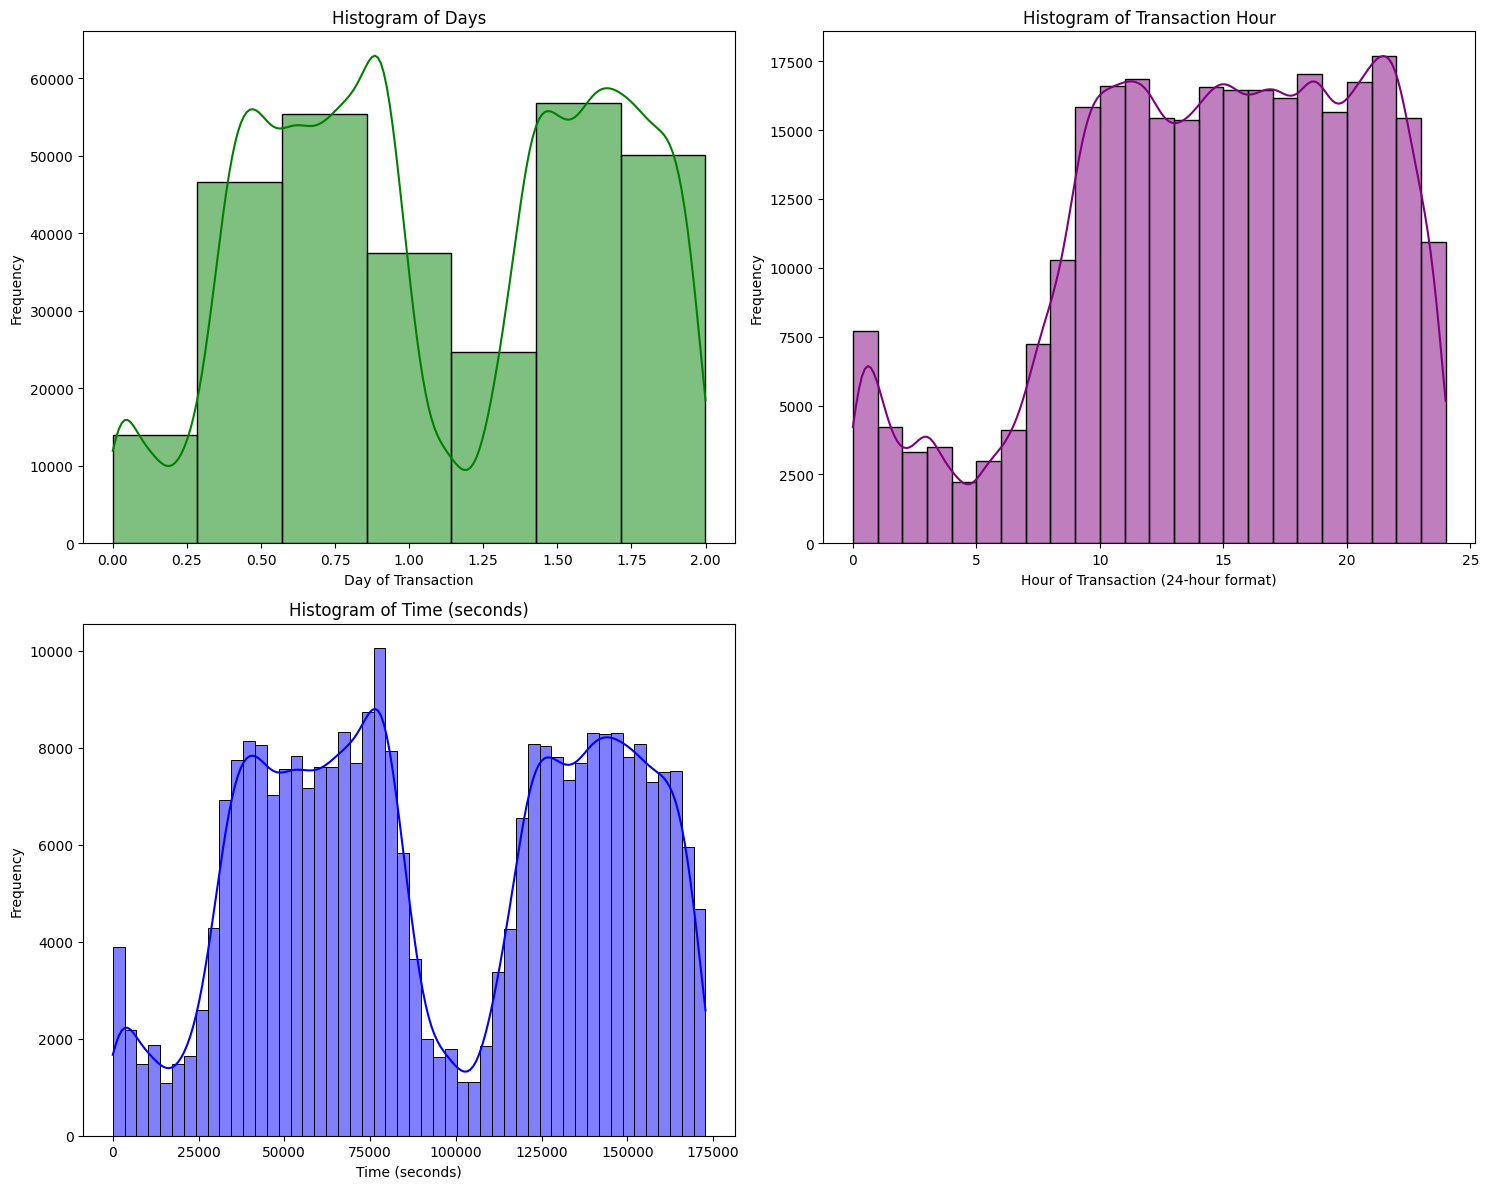

In [166]:
df_eda['Time_Hours'] = df_eda['Time'] / 3600
df_eda['Time_Days'] = df_eda['Time'] / (3600 * 24)
df_eda['Transaction_Hour'] = df_eda['Time_Hours'] % 24

plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
sns.histplot(df_eda['Time_Days'], bins=7, kde=True, color='green')
plt.title('Histogram of Days')
plt.xlabel('Day of Transaction')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
sns.histplot(df_eda['Transaction_Hour'], bins=24, kde=True, color='purple')
plt.title('Histogram of Transaction Hour')
plt.xlabel('Hour of Transaction (24-hour format)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
sns.histplot(df_eda['Time'], bins=50, kde=True, color='blue')
plt.title('Histogram of Time (seconds)')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

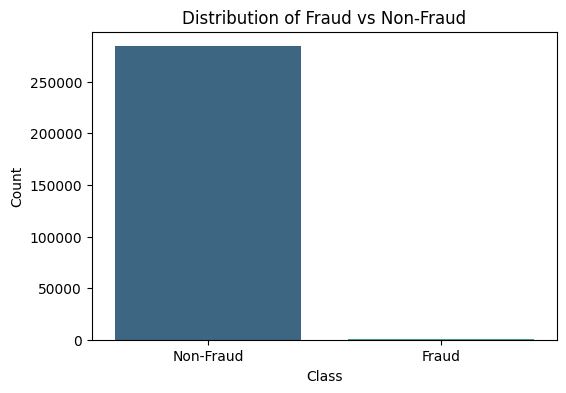

Number of Fraudulent Transactions: 0.17%


In [170]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df_eda, palette='viridis', hue='Class', legend=False)
plt.title('Distribution of Fraud vs Non-Fraud')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

fraud_percentage = (df_eda['Class'].value_counts()[1] / len(df_eda)) * 100
print(f"Number of Fraudulent Transactions: {fraud_percentage:.2f}%")

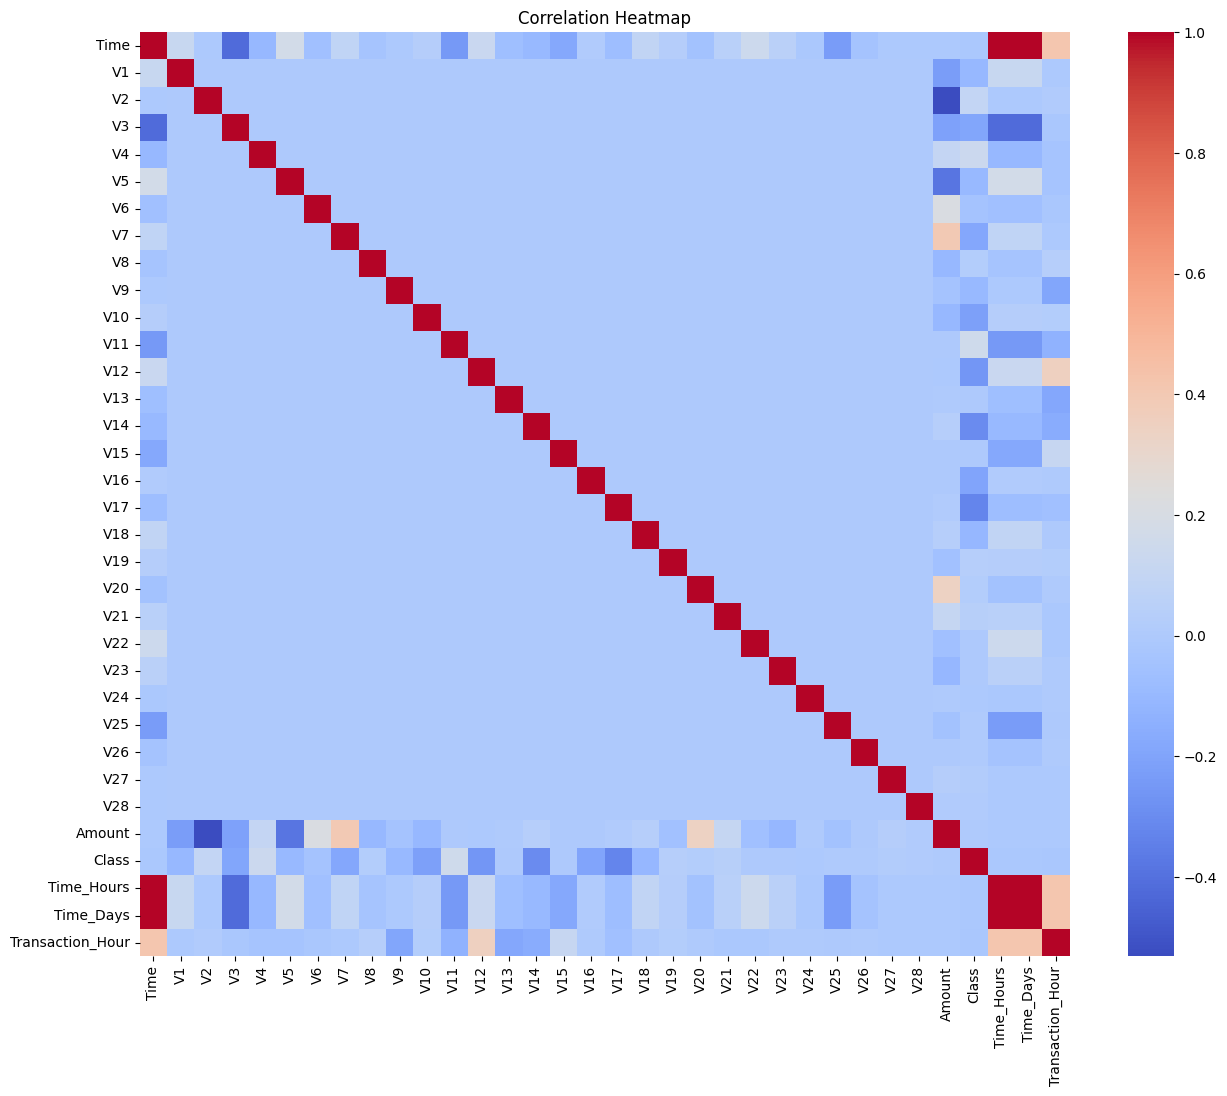

In [ ]:
plt.figure(figsize=(15, 12))
corr = df_eda.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

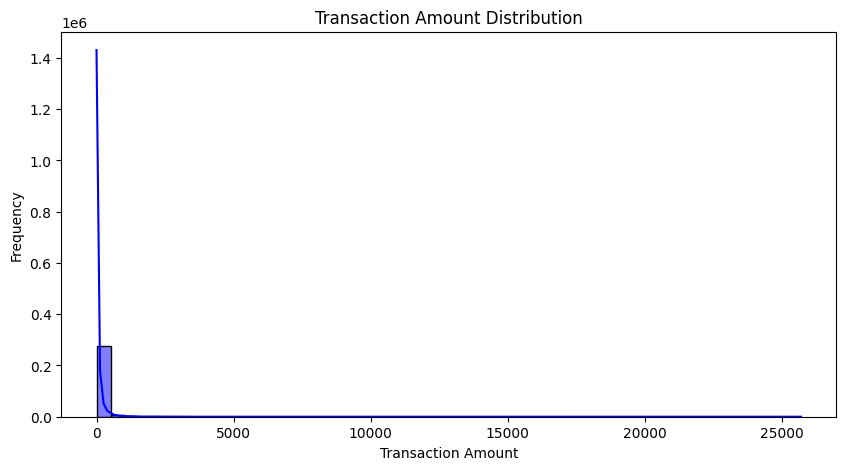

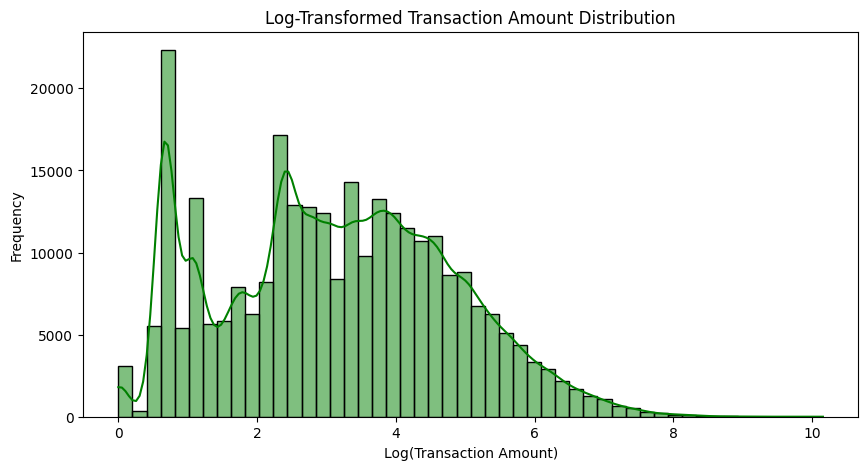

In [ ]:
#Transaction amounts are skewed, making analysis challenging. Applying log transformation reduces skewness and normalizes data in transaction distributions.

plt.figure(figsize=(10, 5))
sns.histplot(df_eda['Amount'], bins=50, kde=True, color='blue')
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

df_eda['Log_Amount'] = np.log1p(df_eda['Amount'])

plt.figure(figsize=(10, 5))
sns.histplot(df_eda['Log_Amount'], bins=50, kde=True, color='green')
plt.title('Log-Transformed Transaction Amount Distribution')
plt.xlabel('Log(Transaction Amount)')
plt.ylabel('Frequency')
plt.show()

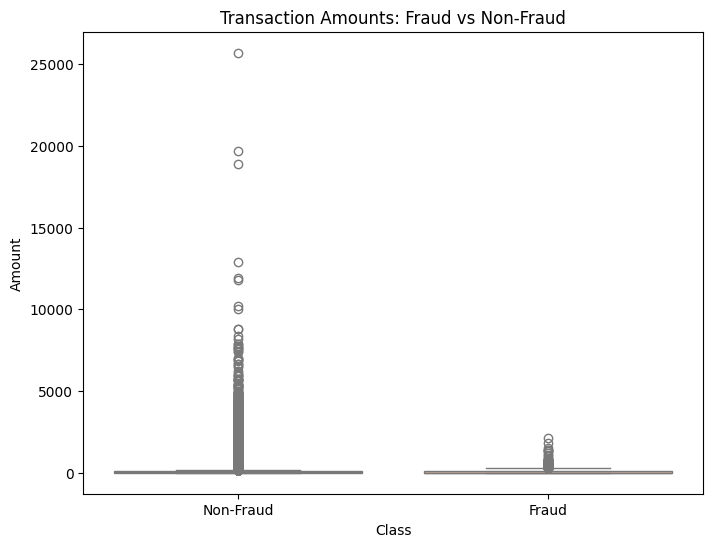

In [174]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=df_eda, palette='coolwarm', hue='Class', legend=False)
plt.title('Transaction Amounts: Fraud vs Non-Fraud')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

In [175]:
#Distribution of PCA transformed features

def plot_kde_for_feature(feature):
    plt.figure(figsize=(10, 6))

    sns.kdeplot(df_eda.loc[df_eda['Class'] == 0, feature], label='Non-Fraud', fill=True, color='blue')
    sns.kdeplot(df_eda.loc[df_eda['Class'] == 1, feature], label='Fraud', fill=True, color='red')

    plt.title(f'Distribution of {feature}')
    plt.legend()
    plt.show()

feature_dropdown = widgets.Dropdown(options=[f'V{i}' for i in range(1, 29)], value='V1', description='Feature:', disabled=False)

interact(plot_kde_for_feature, feature=feature_dropdown)

interactive(children=(Dropdown(description='Feature:', options=('V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8'…

<function __main__.plot_kde_for_feature(feature)>

In [ ]:
'''
X = df.drop(['Class', 'Time', 'Amount'], axis=1)
X_scaled = StandardScaler().fit_transform(X)

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['Class'], palette='viridis', alpha=0.7)
plt.title('t-SNE Clustering of Transactions')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Class', labels=['Non-Fraud', 'Fraud'])
plt.show()'''

"# Scale PCA features\nX = df.drop(['Class', 'Time', 'Amount'], axis=1)\nX_scaled = StandardScaler().fit_transform(X)\n\n# Apply t-SNE\ntsne = TSNE(n_components=2, random_state=42)\nX_tsne = tsne.fit_transform(X_scaled)\n\n# Plot t-SNE results\nplt.figure(figsize=(10, 7))\nsns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['Class'], palette='viridis', alpha=0.7)\nplt.title('t-SNE Clustering of Transactions')\nplt.xlabel('t-SNE 1')\nplt.ylabel('t-SNE 2')\nplt.legend(title='Class', labels=['Non-Fraud', 'Fraud'])\nplt.show()"

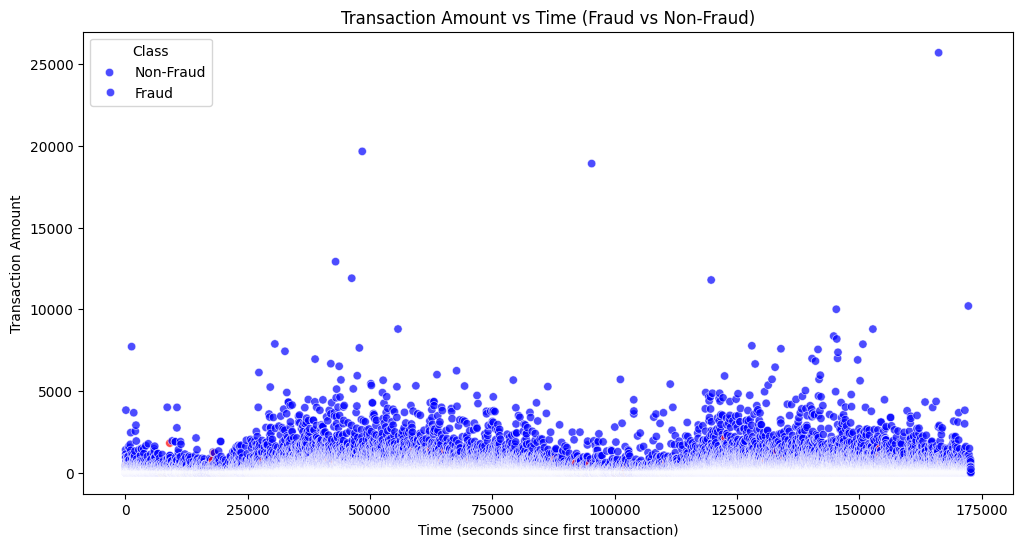

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_eda, x='Time', y='Amount', hue='Class', palette={0: 'blue', 1: 'red'}, alpha=0.7)
plt.title('Transaction Amount vs Time (Fraud vs Non-Fraud)')
plt.xlabel('Time (seconds since first transaction)')
plt.ylabel('Transaction Amount')
plt.legend(title='Class', labels=['Non-Fraud', 'Fraud'])
plt.show()

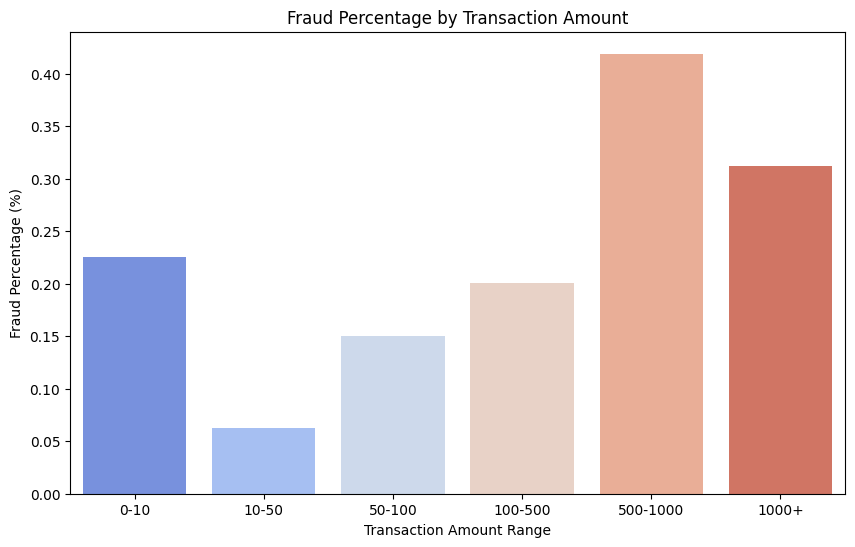

In [180]:
df_eda['Amount_Bin'] = pd.cut(df_eda['Amount'], bins=[0, 10, 50, 100, 500, 1000, 5000], labels=['0-10', '10-50', '50-100', '100-500', '500-1000', '1000+'])

fraud_percentage = df_eda.groupby('Amount_Bin', observed=False)['Class'].mean() * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_percentage.index, y=fraud_percentage.values, palette="coolwarm", hue=fraud_percentage.index, legend=False)
plt.title('Fraud Percentage by Transaction Amount')
plt.xlabel('Transaction Amount Range')
plt.ylabel('Fraud Percentage (%)')
plt.show()

In [179]:
def plot_fraud_probability(feature):
    df_eda['Binned_Feature'] = pd.cut(df_eda[feature], bins=10)

    fraud_prob = df_eda.groupby('Binned_Feature', observed=False)['Class'].mean()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=fraud_prob.index.astype(str), y=fraud_prob.values, palette='viridis', hue=fraud_prob.index.astype(str), legend=False)
    plt.title(f'Fraud Probability by {feature} Feature Bin')
    plt.xlabel(f'{feature} Feature Range')
    plt.ylabel('Fraud Probability')
    plt.xticks(rotation=45)
    plt.show()

feature_dropdown = widgets.Dropdown(
    options=[f'V{i}' for i in range(1, 29)], value='V1', description='Feature:', disabled=False)

interact(plot_fraud_probability, feature=feature_dropdown)

interactive(children=(Dropdown(description='Feature:', options=('V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8'…

<function __main__.plot_fraud_probability(feature)>

In [ ]:
def fraud_probability_features():
    high_fraud_features = []
    low_fraud_features = []

    for feature in [f'V{i}' for i in range(1, 29)]:
        df_eda['Binned_Feature'] = pd.cut(df_eda[feature], bins=10)

        fraud_prob = df_eda.groupby('Binned_Feature', observed=False)['Class'].mean()

        if (fraud_prob > 0.8).any():
            high_fraud_features.append(feature)
        elif (fraud_prob < 0.10).any():
            low_fraud_features.append(feature)

    return high_fraud_features, low_fraud_features

high_fraud_features, low_fraud_features = fraud_probability_features()

print("Features with fraud probability greater than 80%:")
print(high_fraud_features)
print("\nFeatures with fraud probability less than 15%:")
print(low_fraud_features)

Features with fraud probability greater than 80%:
['V2', 'V3', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']

Features with fraud probability less than 15%:
['V1', 'V4', 'V5', 'V6', 'V8', 'V13', 'V15', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']


<ipython-input-181-2b6a94f1d866>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=outliers, palette='viridis')


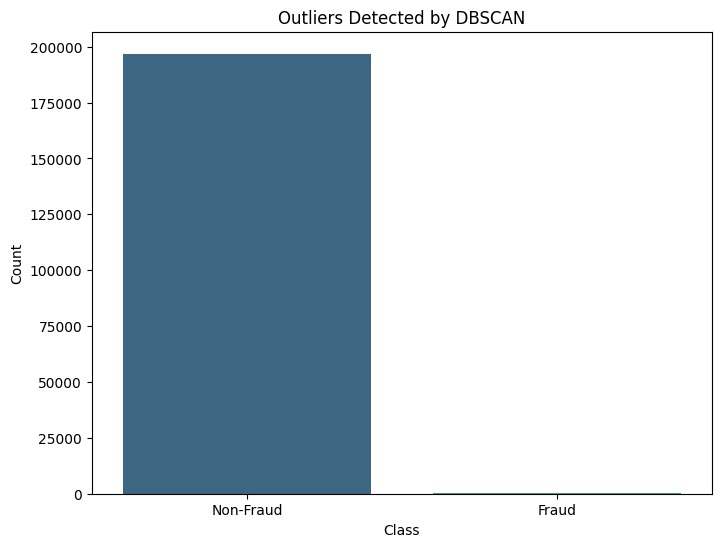

<ipython-input-181-2b6a94f1d866>:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Cluster', loc='best')


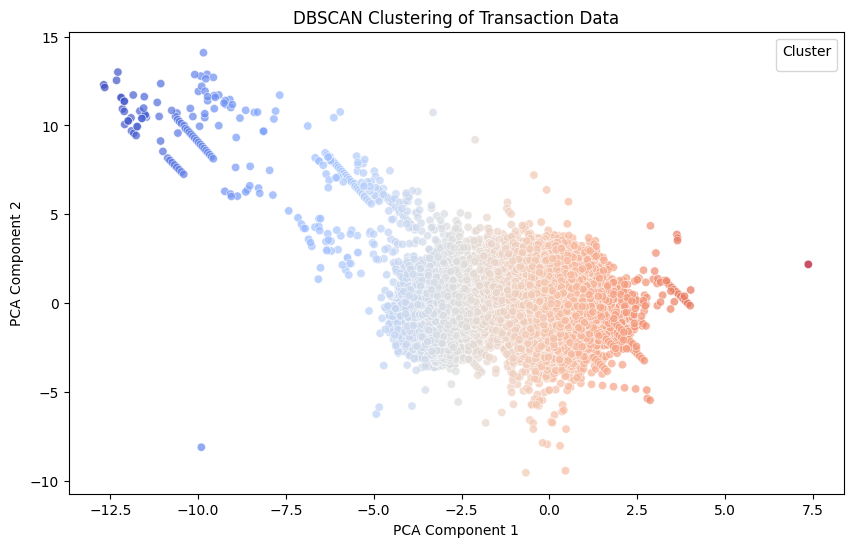

Number of outliers detected by DBSCAN: 197350


In [181]:
features = [f'V{i}' for i in range(1, 29)]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_eda[features])

dbscan = DBSCAN(eps=0.5, min_samples=5)
df_eda['DBSCAN_Label'] = dbscan.fit_predict(X_scaled)

outliers = df_eda[df_eda['DBSCAN_Label'] == -1]
inliers = df_eda[df_eda['DBSCAN_Label'] != -1]

plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=outliers, palette='viridis')
plt.title('Outliers Detected by DBSCAN')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
#hue=df_eda['DBSCAN_Label']
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=X_pca[:, 0], palette='coolwarm', alpha=0.7, legend=False)
plt.title('DBSCAN Clustering of Transaction Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', loc='best')
plt.show()

print(f"Number of outliers detected by DBSCAN: {len(outliers)}")

In [ ]:
X = df.drop(['Class'], axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train[['Time', 'Amount']] = scaler.fit_transform(X_train[['Time', 'Amount']])
X_test[['Time', 'Amount']] = scaler.transform(X_test[['Time', 'Amount']])

In [ ]:
n_neighbors = 10
knn = NearestNeighbors(n_neighbors=n_neighbors)
knn.fit(X_train)

distances, indices = knn.kneighbors(X_train)

edge_index = []
for i, neighbors in enumerate(indices):
    for neighbor in neighbors:
        if i != neighbor:
            edge_index.append([i, neighbor])

edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()

In [ ]:
#Converting features and labels to tensors
x = torch.tensor(X_train.values.astype(np.float32), dtype=torch.float)
y = torch.tensor(y_train.values, dtype=torch.long)
data = Data(x=x, edge_index=edge_index, y=y)

In [ ]:
class GraphSAGE(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GraphSAGE, self).__init__()
        self.conv1 = SAGEConv(in_channels, hidden_channels)
        self.conv2 = SAGEConv(hidden_channels, out_channels)
        self.fc = torch.nn.Linear(out_channels, 2)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        return self.fc(x)

In [ ]:
#Creating model, optimizer, and loss function
model = GraphSAGE(in_channels=x.size(1), hidden_channels=64, out_channels=2)
optimizer = Adam(model.parameters(), lr=0.01)
criterion = CrossEntropyLoss()

model.train()
for epoch in range(50):
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out, data.y)
    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

Epoch 1, Loss: 0.4075
Epoch 2, Loss: 0.3430
Epoch 3, Loss: 0.2805
Epoch 4, Loss: 0.2211
Epoch 5, Loss: 0.1686
Epoch 6, Loss: 0.1240
Epoch 7, Loss: 0.0879
Epoch 8, Loss: 0.0603
Epoch 9, Loss: 0.0405
Epoch 10, Loss: 0.0272
Epoch 11, Loss: 0.0187
Epoch 12, Loss: 0.0135
Epoch 13, Loss: 0.0103
Epoch 14, Loss: 0.0083
Epoch 15, Loss: 0.0070
Epoch 16, Loss: 0.0060
Epoch 17, Loss: 0.0054
Epoch 18, Loss: 0.0050
Epoch 19, Loss: 0.0047
Epoch 20, Loss: 0.0046
Epoch 21, Loss: 0.0046
Epoch 22, Loss: 0.0046
Epoch 23, Loss: 0.0046
Epoch 24, Loss: 0.0046
Epoch 25, Loss: 0.0047
Epoch 26, Loss: 0.0047
Epoch 27, Loss: 0.0047
Epoch 28, Loss: 0.0046
Epoch 29, Loss: 0.0046
Epoch 30, Loss: 0.0045
Epoch 31, Loss: 0.0045
Epoch 32, Loss: 0.0044
Epoch 33, Loss: 0.0043
Epoch 34, Loss: 0.0042
Epoch 35, Loss: 0.0042
Epoch 36, Loss: 0.0041
Epoch 37, Loss: 0.0041
Epoch 38, Loss: 0.0040
Epoch 39, Loss: 0.0040
Epoch 40, Loss: 0.0040
Epoch 41, Loss: 0.0040
Epoch 42, Loss: 0.0040
Epoch 43, Loss: 0.0040
Epoch 44, Loss: 0.00

In [183]:
model.eval()
with torch.no_grad():
    predictions = model(data.x, data.edge_index).argmax(dim=1)
    accuracy = (predictions == data.y).sum().item() / len(data.y)
    precision = precision_score(data.y.numpy(), predictions.numpy())
    recall = recall_score(data.y.numpy(), predictions.numpy())

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.9993
Precision: 0.8338
Recall: 0.7612
